###Install NLTK

In [135]:
pip install nltk

###Install Library Sastrawi

In [136]:
pip install Sastrawi

#Import Library

In [137]:
import numpy as np
import re
import pandas as pd
import nltk
import Sastrawi
import string

###Upload Files Dataset Hasil Crawling

In [138]:
from google.colab import files
uploades = files.upload()

df = pd.read_excel("polusi_udara.xlsx")

Saving polusi_udara.xlsx to polusi_udara.xlsx


In [139]:
df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Tue Oct 31 23:05:53 +0000 2023,1719490906880090112,@ohmybeautybank tidak henti hentinya bilang pa...,0,0,0,0,in,1398206848927290112,1719262167286060032,yo0ngimania,https://twitter.com/yo0ngimania/status/1719490...
1,Tue Oct 31 17:50:54 +0000 2023,1719411639613829888,Para Antek Corporation dari politikus sampai j...,0,0,1,2,in,1226838802162800128,1719411639613829888,ibnuchunke,https://twitter.com/ibnuchunke/status/17194116...
2,Tue Oct 31 16:52:41 +0000 2023,1719396988326929920,Langit Jakarta kelabu Aku kira polusi udara. T...,0,0,0,1,in,1170231355805850112,1719396988326929920,Asrorudn,https://twitter.com/Asrorudn/status/1719396988...
3,Tue Oct 31 16:34:00 +0000 2023,1719392287984329984,Israel iki nafas ae wes nyerimpeti dunyo ngent...,0,2,0,0,in,1440878684320110080,1719392287984329984,byunnbacon__,https://twitter.com/byunnbacon__/status/171939...
4,Tue Oct 31 14:31:08 +0000 2023,1719361368091150080,@pupuk_indonesia Semoga dengan program ini pol...,0,1,0,0,in,719534833332977024,1719301263622579968,denistwitt3r,https://twitter.com/denistwitt3r/status/171936...


In [140]:
total_rows = df.shape[0]
print(f'{total_rows}')

3165


In [141]:
df.dtypes

created_at             object
id_str                  int64
full_text              object
quote_count             int64
reply_count             int64
retweet_count           int64
favorite_count          int64
lang                   object
user_id_str             int64
conversation_id_str     int64
username               object
tweet_url              object
dtype: object

In [142]:
print(df.columns)

Index(['created_at', 'id_str', 'full_text', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'lang', 'user_id_str',
       'conversation_id_str', 'username', 'tweet_url'],
      dtype='object')


#Cleansing Dataset

###Menghapus Duplicate

In [143]:
df.drop_duplicates(subset='full_text', keep='first', inplace=True)

In [144]:
total_rows = df.shape[0]
print(f'{total_rows}')

3154


In [145]:
df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Tue Oct 31 23:05:53 +0000 2023,1719490906880090112,@ohmybeautybank tidak henti hentinya bilang pa...,0,0,0,0,in,1398206848927290112,1719262167286060032,yo0ngimania,https://twitter.com/yo0ngimania/status/1719490...
1,Tue Oct 31 17:50:54 +0000 2023,1719411639613829888,Para Antek Corporation dari politikus sampai j...,0,0,1,2,in,1226838802162800128,1719411639613829888,ibnuchunke,https://twitter.com/ibnuchunke/status/17194116...
2,Tue Oct 31 16:52:41 +0000 2023,1719396988326929920,Langit Jakarta kelabu Aku kira polusi udara. T...,0,0,0,1,in,1170231355805850112,1719396988326929920,Asrorudn,https://twitter.com/Asrorudn/status/1719396988...
3,Tue Oct 31 16:34:00 +0000 2023,1719392287984329984,Israel iki nafas ae wes nyerimpeti dunyo ngent...,0,2,0,0,in,1440878684320110080,1719392287984329984,byunnbacon__,https://twitter.com/byunnbacon__/status/171939...
4,Tue Oct 31 14:31:08 +0000 2023,1719361368091150080,@pupuk_indonesia Semoga dengan program ini pol...,0,1,0,0,in,719534833332977024,1719301263622579968,denistwitt3r,https://twitter.com/denistwitt3r/status/171936...


###Menghapus Kolom dengan label yang tidak diperlukan

In [146]:
df = df.drop('created_at', axis=1)
df = df.drop('id_str', axis=1)
df = df.drop('quote_count', axis=1)
df = df.drop('reply_count', axis=1)
df = df.drop('retweet_count', axis=1)
df = df.drop('favorite_count', axis=1)
df = df.drop('lang', axis=1)
df = df.drop('user_id_str', axis=1)
df = df.drop('conversation_id_str', axis=1)
df = df.drop('username', axis=1)
df = df.drop('tweet_url', axis=1)

In [147]:
df.head()

,full_text
0,@ohmybeautybank tidak henti hentinya bilang pa...
1,Para Antek Corporation dari politikus sampai j...
2,Langit Jakarta kelabu Aku kira polusi udara. T...
3,Israel iki nafas ae wes nyerimpeti dunyo ngent...
4,@pupuk_indonesia Semoga dengan program ini pol...


###Menghilangkan Mentions pada Full Text

In [148]:
def cleanmentions(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text)
  text = re.sub(r"(?:\@|https?\://|www)\S+","",text)
  text = re.sub(r'_','',text)

  return text

In [149]:
df['full_text'] = df['full_text'].astype(str)
df['full_text'].fillna('',inplace=True)

In [150]:
df['full_text'] = df['full_text'].apply(cleanmentions)
df.head()

,full_text
0,tidak henti hentinya bilang pake xixiu (real ...
1,Para Antek Corporation dari politikus sampai j...
2,Langit Jakarta kelabu Aku kira polusi udara. T...
3,Israel iki nafas ae wes nyerimpeti dunyo ngent...
4,indonesia Semoga dengan program ini polusi uda...


###Menghilangkan Punctuation

In [151]:
df['full_text'] = df['full_text'].str.replace('[^\w\s]','', regex=True)
df.head()

,full_text
0,tidak henti hentinya bilang pake xixiu real m...
1,Para Antek Corporation dari politikus sampai j...
2,Langit Jakarta kelabu Aku kira polusi udara Te...
3,Israel iki nafas ae wes nyerimpeti dunyo ngent...
4,indonesia Semoga dengan program ini polusi uda...


###Menghilangkan Angka pada Full Text

In [152]:
df['full_text'] = df['full_text'].str.replace('[0-9]+','',regex=True)
df.head()

,full_text
0,tidak henti hentinya bilang pake xixiu real m...
1,Para Antek Corporation dari politikus sampai j...
2,Langit Jakarta kelabu Aku kira polusi udara Te...
3,Israel iki nafas ae wes nyerimpeti dunyo ngent...
4,indonesia Semoga dengan program ini polusi uda...


#Case Folding

In [153]:
df['full_text'] = df['full_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,full_text
0,tidak henti hentinya bilang pake xixiu real me...
1,para antek corporation dari politikus sampai j...
2,langit jakarta kelabu aku kira polusi udara te...
3,israel iki nafas ae wes nyerimpeti dunyo ngent...
4,indonesia semoga dengan program ini polusi uda...


#Download library untuk Tokenize, Stopwords, Stemming

In [154]:
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

###Tahap Tokenizing

In [155]:
def tokenize_text(text):
  tokens = nltk.tokenize.word_tokenize(text)
  return tokens

In [156]:
df['token'] =df ['full_text'].apply(tokenize_text)
df.head()

,full_text,token
0,tidak henti hentinya bilang pake xixiu real me...,"[tidak, henti, hentinya, bilang, pake, xixiu, ..."
1,para antek corporation dari politikus sampai j...,"[para, antek, corporation, dari, politikus, sa..."
2,langit jakarta kelabu aku kira polusi udara te...,"[langit, jakarta, kelabu, aku, kira, polusi, u..."
3,israel iki nafas ae wes nyerimpeti dunyo ngent...,"[israel, iki, nafas, ae, wes, nyerimpeti, duny..."
4,indonesia semoga dengan program ini polusi uda...,"[indonesia, semoga, dengan, program, ini, polu..."


###Tahap Stopword Removal

In [157]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print (stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [158]:
def stopword_text(tokens):
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords:
      cleaned_tokens.append(token)
  return cleaned_tokens

In [159]:
df['stop'] = df['token'].apply(stopword_text)
df.head()

,full_text,token,stop
0,tidak henti hentinya bilang pake xixiu real me...,"[tidak, henti, hentinya, bilang, pake, xixiu, ...","[henti, hentinya, bilang, pake, xixiu, real, m..."
1,para antek corporation dari politikus sampai j...,"[para, antek, corporation, dari, politikus, sa...","[antek, corporation, politikus, jajaran, mente..."
2,langit jakarta kelabu aku kira polusi udara te...,"[langit, jakarta, kelabu, aku, kira, polusi, u...","[langit, jakarta, kelabu, aku, kira, polusi, u..."
3,israel iki nafas ae wes nyerimpeti dunyo ngent...,"[israel, iki, nafas, ae, wes, nyerimpeti, duny...","[israel, iki, nafas, ae, wes, nyerimpeti, duny..."
4,indonesia semoga dengan program ini polusi uda...,"[indonesia, semoga, dengan, program, ini, polu...","[indonesia, semoga, program, polusi, udara, te..."


In [160]:
df = df.drop('stop', axis=1)

###Tahap Stemming

In [161]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

In [162]:
def stemming_text(tokens):
  hasil = [stemmer.stem(token) for token in tokens]
  return hasil

###Menyimpan Hasil Preprocessing

In [163]:
df.to_csv('hasil_preprocessing.csv', index=False)

files.download('hasil_preprocessing.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [164]:
from nltk.probability import FreqDist

In [165]:
import matplotlib.pyplot as plt

In [173]:
df.to_csv("polusi_cleantweets.csv", index = False)
data = pd.read_csv("polusi_cleantweets.csv")
data.head(30)

,full_text,token
0,tidak henti hentinya bilang pake xixiu real me...,"['tidak', 'henti', 'hentinya', 'bilang', 'pake..."
1,para antek corporation dari politikus sampai j...,"['para', 'antek', 'corporation', 'dari', 'poli..."
2,langit jakarta kelabu aku kira polusi udara te...,"['langit', 'jakarta', 'kelabu', 'aku', 'kira',..."
3,israel iki nafas ae wes nyerimpeti dunyo ngent...,"['israel', 'iki', 'nafas', 'ae', 'wes', 'nyeri..."
4,indonesia semoga dengan program ini polusi uda...,"['indonesia', 'semoga', 'dengan', 'program', '..."
5,pakistan ada masalah polusi udara jugaâ,"['pakistan', 'ada', 'masalah', 'polusi', 'udar..."
6,kualitas udara jakarta masih buruk meskipun pe...,"['kualitas', 'udara', 'jakarta', 'masih', 'bur..."
7,pak kalau blh usul semua kota besar amp kecil ...,"['pak', 'kalau', 'blh', 'usul', 'semua', 'kota..."
8,bbm adlh hasil tambang tpi punya dampak polusi...,"['bbm', 'adlh', 'hasil', 'tambang', 'tpi', 'pu..."
9,wow besok aku menghirup polusi udara yang sama...,"['wow', 'besok', 'aku', 'menghirup', 'polusi',..."


#Pemberian Sentiment dengan menggunakan kamus Lexicon Indonesia

In [174]:
!pip install googletrans==4.0.0-rc1

In [175]:
import pandas as pd
import googletrans
from googletrans import Translator

In [176]:
df.to_csv("polusi_cleantweets.csv", index = False)
data = pd.read_csv("polusi_cleantweets.csv")
data.head(30)

,full_text,token
0,tidak henti hentinya bilang pake xixiu real me...,"['tidak', 'henti', 'hentinya', 'bilang', 'pake..."
1,para antek corporation dari politikus sampai j...,"['para', 'antek', 'corporation', 'dari', 'poli..."
2,langit jakarta kelabu aku kira polusi udara te...,"['langit', 'jakarta', 'kelabu', 'aku', 'kira',..."
3,israel iki nafas ae wes nyerimpeti dunyo ngent...,"['israel', 'iki', 'nafas', 'ae', 'wes', 'nyeri..."
4,indonesia semoga dengan program ini polusi uda...,"['indonesia', 'semoga', 'dengan', 'program', '..."
5,pakistan ada masalah polusi udara jugaâ,"['pakistan', 'ada', 'masalah', 'polusi', 'udar..."
6,kualitas udara jakarta masih buruk meskipun pe...,"['kualitas', 'udara', 'jakarta', 'masih', 'bur..."
7,pak kalau blh usul semua kota besar amp kecil ...,"['pak', 'kalau', 'blh', 'usul', 'semua', 'kota..."
8,bbm adlh hasil tambang tpi punya dampak polusi...,"['bbm', 'adlh', 'hasil', 'tambang', 'tpi', 'pu..."
9,wow besok aku menghirup polusi udara yang sama...,"['wow', 'besok', 'aku', 'menghirup', 'polusi',..."


In [179]:
df.drop(columns=['token'], inplace=True)

df.head()

,full_text
0,tidak henti hentinya bilang pake xixiu real me...
1,para antek corporation dari politikus sampai j...
2,langit jakarta kelabu aku kira polusi udara te...
3,israel iki nafas ae wes nyerimpeti dunyo ngent...
4,indonesia semoga dengan program ini polusi uda...


In [180]:
translator = Translator()
translations = {}
for column in df.columns:
    # Unique elements of the column
    unique_elements = df[column].unique()
for element in unique_elements:
  # Adding all the translation to a dictionary (translations)
  translations[element] = translator.translate(element).text
translations

{'tidak henti hentinya bilang pake xixiu real menerjang polusi udara setiap hari': 'I never stop saying that using Xixiu Real fights air pollution every day',
 'para antek corporation dari politikus sampai jajaran menteri koar mau menyelamatkan dunia dengan kendaraan listrik yg nantinya limbah baterai paling beracun bakal jadi masalah baru dan padahal seluruh bumi juga tahu penyebab utama polusi udara asap pabrik': 'Corporation henchmen from politicians to ministers want to save the world with electric vehicles which in the future, the most toxic battery waste will become a new problem and even though the whole world also knows the main cause of air pollution, factory fumes',
 'langit jakarta kelabu aku kira polusi udara ternyata awan rindu mendera': "Jakarta's sky is gray, I thought it was air pollution, but it turns out the clouds are whistling",
 'israel iki nafas ae wes nyerimpeti dunyo ngentek i oksigen male tembak tembak an garai polusi udara ae ancen gak onok manfaate israel ore

In [181]:
df.replace(translations, inplace = True)
df.head()

,full_text
0,I never stop saying that using Xixiu Real figh...
1,Corporation henchmen from politicians to minis...
2,"Jakarta's sky is gray, I thought it was air po..."
3,Israel is a breath of fresh air. The world is ...
4,Indonesia hopes that with this program air pol...


In [182]:
df.to_csv('translate_polusiudara.csv', encoding='utf8', index=False)

files.download('translate_polusiudara.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [183]:
import pandas as pd
def load_data():
  data = pd.read_csv('/content/translate_polusiudara.csv')
  return data

In [184]:
df = load_data()
df.head()

,full_text
0,I never stop saying that using Xixiu Real figh...
1,Corporation henchmen from politicians to minis...
2,"Jakarta's sky is gray, I thought it was air po..."
3,Israel is a breath of fresh air. The world is ...
4,Indonesia hopes that with this program air pol...


In [185]:
!pip install pandas
!pip install vaderSentiment

In [215]:
import pandas as pd

# Replace 'your_dataset.csv' with your actual file path
file_path = '/content/translate_polusiudara.csv'
df = pd.read_csv(file_path)

In [216]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [217]:
analyzer = SentimentIntensityAnalyzer()

In [218]:
def get_sentiment_score(text):
    if isinstance(text, str):
        return analyzer.polarity_scores(text)['compound']
    else:
        return 0.0

In [219]:
df['Compound_Score'] = df['full_text'].apply(get_sentiment_score)

In [220]:
print(df[['full_text', 'Compound_Score']])

                                              full_text  Compound_Score
0     I never stop saying that using Xixiu Real figh...         -0.2052
1     Corporation henchmen from politicians to minis...         -0.3321
2     Jakarta's sky is gray, I thought it was air po...          0.0000
3     Israel is a breath of fresh air. The world is ...         -0.0274
4     Indonesia hopes that with this program air pol...          0.5423
...                                                 ...             ...
3149  air pollution data update at midnight midnight...         -0.9492
3150  This is the party's sin, Uncle Kumis, who took...         -0.6124
3151  Jk now it has been discovered that all of this...          0.0613
3152  The red level air pollution day occurred in Ja...         -0.3453
3153  air pollution in Jakarta is very bad today, th...         -0.8967

[3154 rows x 2 columns]


In [221]:
df.nsmallest(10,['Compound_Score'])

,full_text,Compound_Score
1841,Jakarta's air pollution data at dawn today is ...,-0.9770
1579,Hopefully air polluters will be punished more ...,-0.9741
2695,only stupid people are as stupid as the ones w...,-0.9709
1473,"I can't say anything, it's very cruel, the per...",-0.9653
125,all these systems are corrupt they enslave us ...,-0.9590
113,"from the era of the oil-coupid disease, yester...",-0.9571
3096,Jakarta's air pollution data at dawn today fro...,-0.9557
1074,even though the impact of traffic jams is not ...,-0.9547
2798,"In the evening, the air pollution is high, the...",-0.9543
2437,"old people are stupid, stupid, stupid, really,...",-0.9519


In [227]:
df.loc[df['Compound_Score'] < 0, 'Sentiments'] = 'Negatif'

df.loc[df['Compound_Score'] == 0, 'Sentiments'] = 'Netral'

df.loc[df['Compound_Score'] > 0, 'Sentiments'] = 'Positif'

df.head()

,full_text,Compound_Score,Sentiments
0,I never stop saying that using Xixiu Real figh...,-0.2052,Negatif
1,Corporation henchmen from politicians to minis...,-0.3321,Negatif
2,"Jakarta's sky is gray, I thought it was air po...",0.0000,Netral
3,Israel is a breath of fresh air. The world is ...,-0.0274,Negatif
4,Indonesia hopes that with this program air pol...,0.5423,Positif


In [228]:
df.to_csv('hasil_labelling_polusiudara.csv', encoding='utf-8', index = False)

In [229]:
import pandas as pd
def load_data():
    data = pd.read_csv('hasil_labelling_polusiudara.csv')
    return data

In [230]:
df = load_data()
df.head()

,full_text,Compound_Score,Sentiments
0,I never stop saying that using Xixiu Real figh...,-0.2052,Negatif
1,Corporation henchmen from politicians to minis...,-0.3321,Negatif
2,"Jakarta's sky is gray, I thought it was air po...",0.0000,Netral
3,Israel is a breath of fresh air. The world is ...,-0.0274,Negatif
4,Indonesia hopes that with this program air pol...,0.5423,Positif


In [232]:
df = df[df['Compound_Score'] != 0.0]
print(df)

                                              full_text  Compound_Score  \
0     I never stop saying that using Xixiu Real figh...         -0.2052   
1     Corporation henchmen from politicians to minis...         -0.3321   
3     Israel is a breath of fresh air. The world is ...         -0.0274   
4     Indonesia hopes that with this program air pol...          0.5423   
5             Pakistan has an air pollution problem too         -0.4019   
...                                                 ...             ...   
3149  air pollution data update at midnight midnight...         -0.9492   
3150  This is the party's sin, Uncle Kumis, who took...         -0.6124   
3151  Jk now it has been discovered that all of this...          0.0613   
3152  The red level air pollution day occurred in Ja...         -0.3453   
3153  air pollution in Jakarta is very bad today, th...         -0.8967   

     Sentiments  
0       Negatif  
1       Negatif  
3       Negatif  
4       Positif  
5       N

In [233]:
total_rows = df.shape[0]
print(f'{total_rows}')

2531


2531


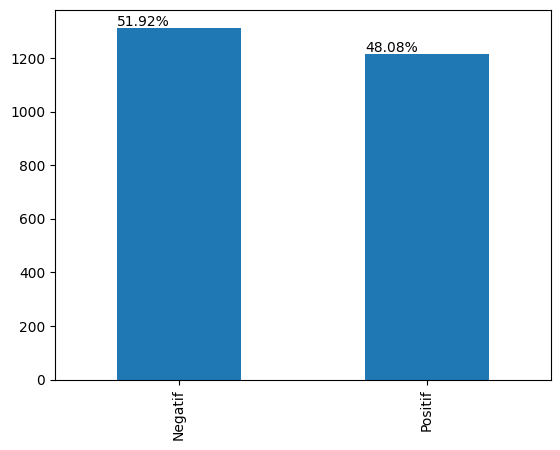

In [234]:
s = pd.value_counts(df['Sentiments'])
ax = s.plot.bar()
n = len(df.index)
print (n)
for p in ax.patches:
    ax.annotate(str(round(p.get_height () / n * 100, 2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

In [235]:
sentiment_counts = df['Compound_Score'].apply(lambda x: 'Negative' if x < 0 else ('Neutral' if x == 0 else 'Positive')).value_counts()

In [236]:
print(sentiment_counts)

Negative    1314
Positive    1217
Name: Compound_Score, dtype: int64
